# Author: Sanjay Kazi


## Task_6: Prediction using Decision Tree Algorithm

### Problem Statement:
#### 1. Create the Decision Tree classifier and visualize it graphically.
#### 2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# ***GRIP*** @ The Spark Foundation

# Importing Libraries

In [61]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

# Loading Data

In [62]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [64]:
data.shape

(150, 5)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [66]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
data.isna().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

- there is no NaN value present

- Now lets visualize the the data above using seaborn library

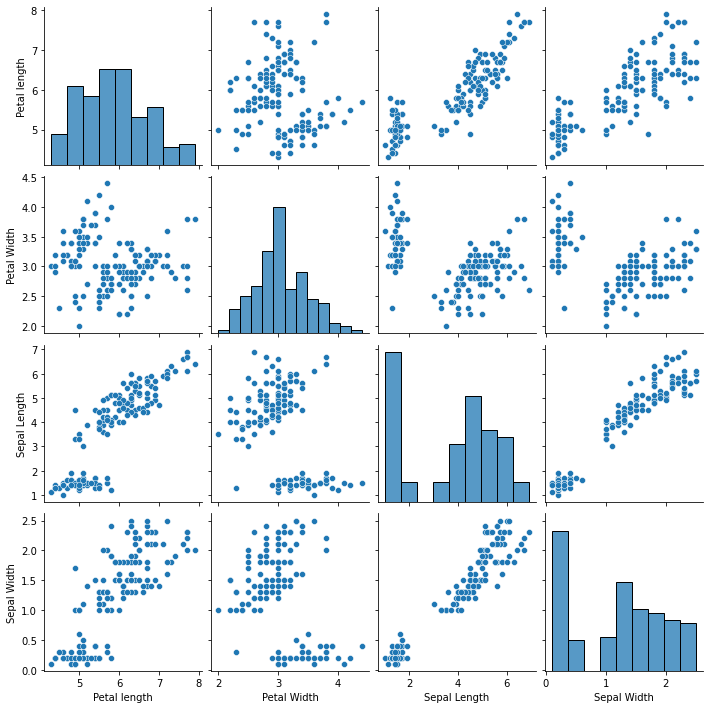

In [68]:
sns.pairplot(data)

- there is a high correlation between sepal length and sepal width which is easily teraceble. 

## Let's plot sepal length vs sepal width data and see if there is any relevent clusters we obtain

In [69]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

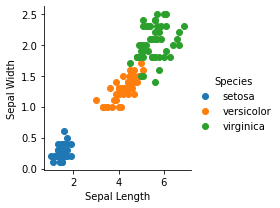

In [71]:

# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()


# Model Building

In [74]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred = tree_classifier.predict(X_test)

In [75]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


## Let's visualize the model

### Text Representation of the tree

In [82]:
from sklearn import tree
text_representation = tree.export_text(tree_classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Visual Representation

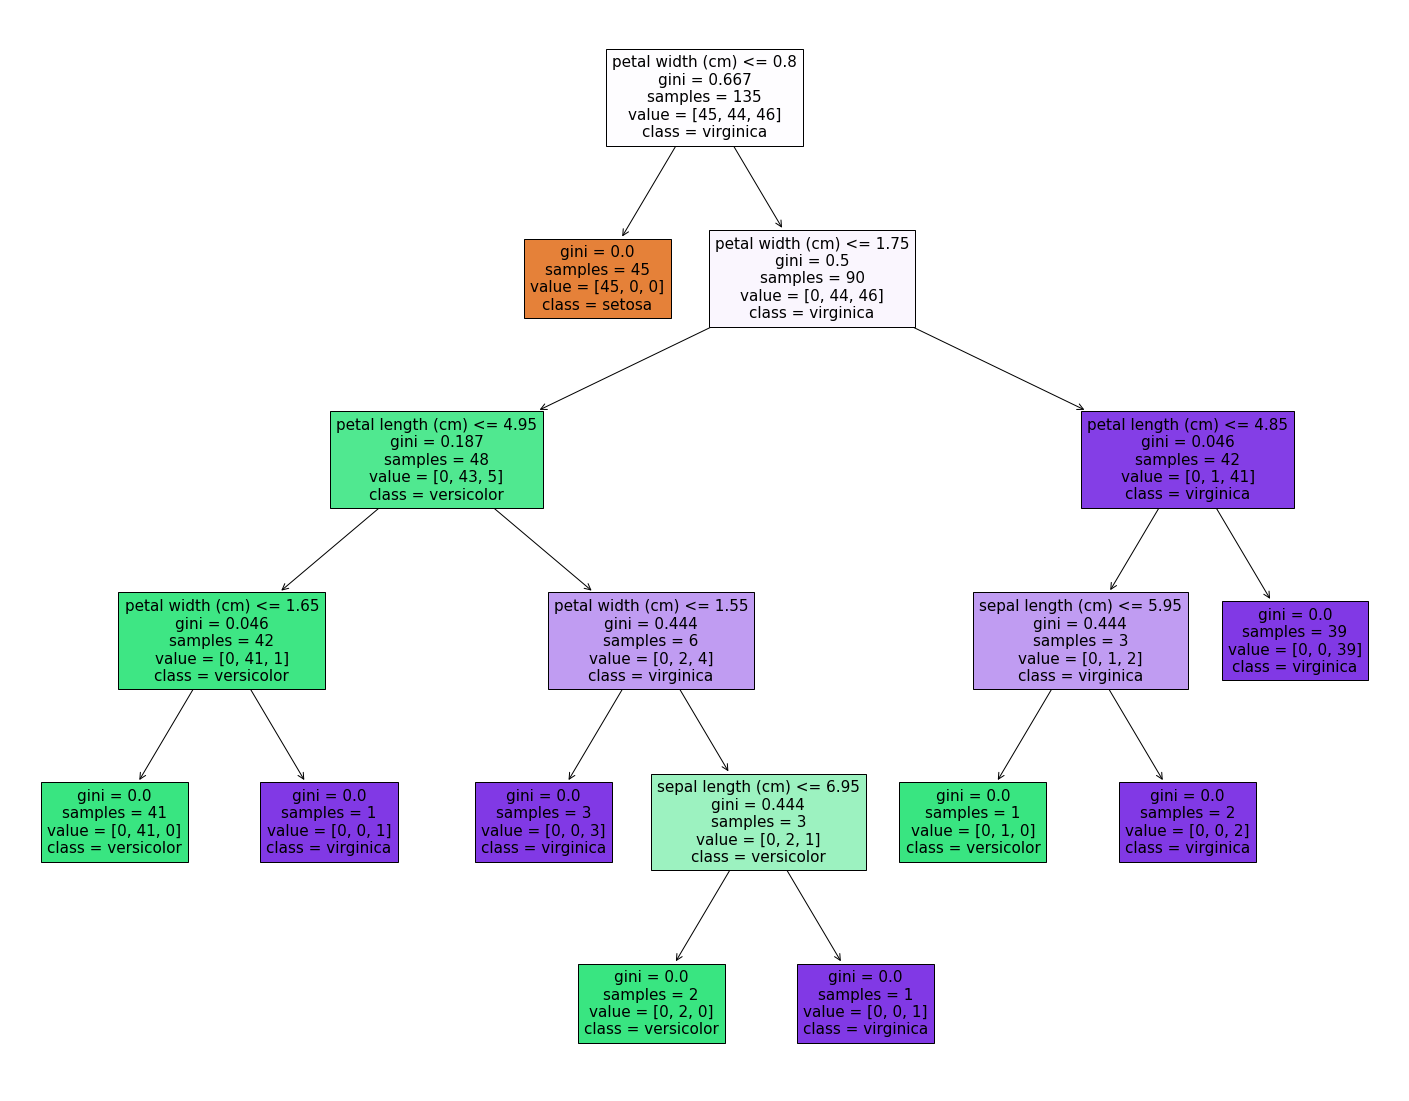

In [84]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

fig.savefig("decistion_tree.png")

- The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree

## Let's see our model's prediction

In [92]:
# Estimating class probabilities
print(tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print("Our model predicts the class as 0, that is, setosa.")

[0]
Our model predicts the class as 0, that is, setosa.


- The data fed are petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm.

## Let's also apply performance metrics to check how good our model is

In [93]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


- this might be a case of over fitting but as we know this is a little dataset and it fits the model very well hence this might be case that we are getting 100% sccuracy.

# Summary

- Thish model is successfylly developed 